In [1]:
from pathlib import Path
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ROOT_DIR = Path('/home/rob/PycharmProjects/objectDetection')
DATA_DIR = ROOT_DIR /'data'

In [3]:
img1 = cv2.imread(str(DATA_DIR / 'images' / 'trafficheader.jpg'))[:,:,::-1]
#img1 = cv2.resize(img1, (1200,800))
img2 = cv2.imread(str(DATA_DIR / 'images' / 'lamborghini.jpg'))[:,:,::-1]
#img2 = cv2.resize(img2, (1200,800))    

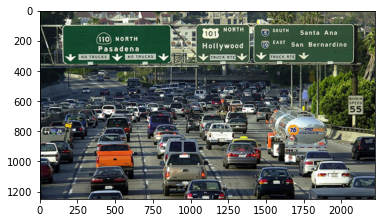

In [4]:
plt.imshow(img1)

## Scaling

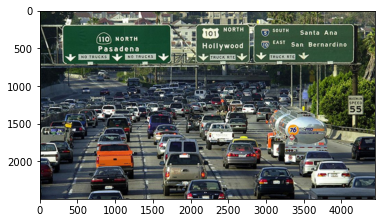

In [6]:
res = cv2.resize(img1, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)

## Translation

$ M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix} $

where $t_x$ = shift in $x$ direction and where $t_y$ = shift in $y$ direction

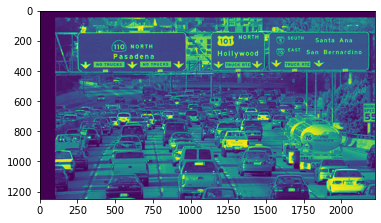

In [14]:
img3 = cv2.imread(str(DATA_DIR / 'images' / 'trafficheader.jpg'), 0)
rows,cols = img3.shape

M = np.float32([[1,0,100], [0,1,50]]) # Transformation matrix
dst = cv2.warpAffine(img3, M, (cols, rows))

plt.imshow(dst)

## Rotation

$ R = \begin{bmatrix} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta)  \end{bmatrix} $

where $\theta$ is angle of rotation

In [5]:
img3 = cv2.imread(str(DATA_DIR / 'images' / 'trafficheader.jpg'), 0)
rows,cols = img3.shape
# cols-1 and rows-1 are the coordinate limits.
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv2.warpAffine(img3,M,(cols,rows))

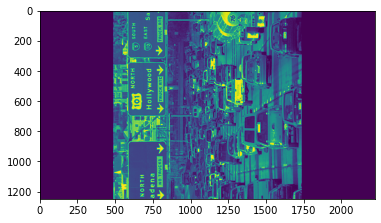

In [6]:
plt.imshow(dst)

## Affine Transformation

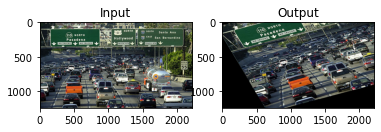

In [10]:
rows, cols, ch = img1.shape

pts1 = np.float32([[50,50], [200,50], [50,200]])
pts2 = np.float32([[10,100], [200,50], [100,250]])

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img1, M, (cols, rows))

plt.subplot(121)
plt.imshow(img1)
plt.title('Input')

plt.subplot(122)
plt.imshow(dst)
plt.title('Output')

plt.show()